<a href="https://colab.research.google.com/github/alexschoenberg22/Capstone-3--Sharks/blob/main/Cats_%26_Dogs_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, InputLayer
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Data Wrangling and EDA

In [2]:
os.getcwd()

'/content'

Total images of cats and dogs: 697

Training set: 278 dogs, 279 cats (557 total images) Test set: 70 dogs, 70 cats (140 total images)

Approximately 20% - 80% train/test split.

In [3]:
!unzip train.zip

Archive:  train.zip
   creating: train/
  inflating: __MACOSX/._train        
  inflating: train/cat_386.jpg       
  inflating: __MACOSX/train/._cat_386.jpg  
  inflating: train/cat_15.jpg        
  inflating: __MACOSX/train/._cat_15.jpg  
  inflating: train/dog_423.jpg       
  inflating: __MACOSX/train/._dog_423.jpg  
  inflating: train/dog_345.jpg       
  inflating: __MACOSX/train/._dog_345.jpg  
  inflating: train/dog_351.jpg       
  inflating: __MACOSX/train/._dog_351.jpg  
  inflating: train/dog_437.jpg       
  inflating: __MACOSX/train/._dog_437.jpg  
  inflating: train/cat_345.jpg       
  inflating: __MACOSX/train/._cat_345.jpg  
  inflating: train/cat_423.jpg       
  inflating: __MACOSX/train/._cat_423.jpg  
  inflating: train/cat_351.jpg       
  inflating: __MACOSX/train/._cat_351.jpg  
  inflating: train/dog_13.jpg        
  inflating: __MACOSX/train/._dog_13.jpg  
  inflating: train/dog_392.jpg       
  inflating: __MACOSX/train/._dog_392.jpg  
  inflating: train/cat

In [4]:
#preparing and processing training data

train_images = []
train_labels = []
shape_tr = (224, 224)
train_path = '/content/train'

for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        img_tr = cv2.imread(os.path.join(train_path, filename))
        train_labels.append(filename.split('_')[0]) #filename convention is (cat/dog)_(imgnumber).jpg/jpeg
        img_tr = cv2.resize(img_tr, shape_tr) #resize all images to uniform shape
        train_images.append(img_tr)
        
#one hot encoding of labels
train_labels = pd.get_dummies(train_labels).values

#converting images list to numpy array
train_images = np.array(train_images)

#splitting training images array into training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, random_state=42)

In [5]:
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: __MACOSX/._test         
  inflating: test/cat_190.jpg        
  inflating: __MACOSX/test/._cat_190.jpg  
  inflating: test/dog_147.jpg        
  inflating: __MACOSX/test/._dog_147.jpg  
  inflating: test/cat_147.jpg        
  inflating: __MACOSX/test/._cat_147.jpg  
  inflating: test/dog_219.jpg        
  inflating: __MACOSX/test/._dog_219.jpg  
  inflating: test/cat_542.jpg        
  inflating: __MACOSX/test/._cat_542.jpg  
  inflating: test/cat_595.jpg        
  inflating: __MACOSX/test/._cat_595.jpg  
  inflating: test/dog_191.jpg        
  inflating: __MACOSX/test/._dog_191.jpg  
  inflating: test/cat_422.jpg        
  inflating: __MACOSX/test/._cat_422.jpg  
  inflating: test/dog_344.jpg        
  inflating: __MACOSX/test/._dog_344.jpg  
  inflating: test/dog_150.jpg        
  inflating: __MACOSX/test/._dog_150.jpg  
  inflating: test/cat_583.jpg        
  inflating: __MACOSX/test/._cat_583.jpg  
  inflating: test/dog_227.jpg    

In [42]:
#preparing and processing testing data

test_images = []
test_labels = []
shape_te = (224, 224)
test_path = '/content/test'

for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        try:
            img_te = cv2.imread(os.path.join(test_path, filename))
            test_labels.append(filename.split('_')[0]) #filename convention is (cat/dog)_(imgnumber).jpg/jpeg
            img_te = cv2.resize(img_te, shape_te) #resize all images to uniform shape
            test_images.append(img_te)
        except Exception as e:
            print(str(e))
        
#one hot encoding of labels - commented out in this case because this is the test set, but test data labels are
#stored in the test_labels list after being organized in the same manner as the training data labels
#test_labels = pd.get_dummies(test_labels).values

#converting images list to numpy array
test_images = np.array(test_images)

In [7]:
train_images.shape

(557, 224, 224, 3)

In [8]:
print(X_train.shape)
print(X_val.shape)

(417, 224, 224, 3)
(140, 224, 224, 3)


Out of the original 557 training images, 557 images were processed into our final training dataset, with 417 in the main training set and 140 in the validation set (75/25 split).

In [9]:
test_images.shape

(140, 224, 224, 3)

Out of the original 140 testing images, 140 were successfully processe into our final testing dataset.

# Data Visualization

[1 0]


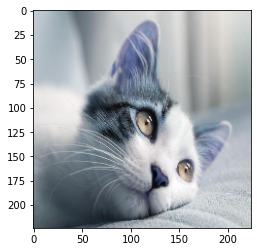

In [10]:
#visualize training data
print(train_labels[10])
plt.imshow(train_images[10])

This is good! This is an image of a cat and it's labeled correctly with one-hot encoding.

[1 0]


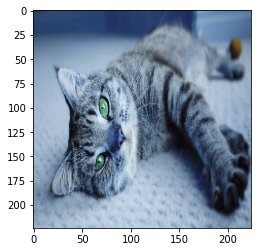

In [11]:
#another check
print(train_labels[500])
plt.imshow(train_images[500])

Another cat, also labeled correctly.

dog


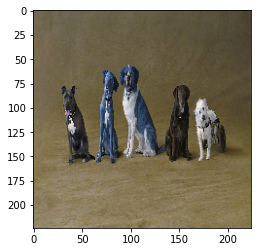

In [12]:
#check testing data in similar way - labels have not been one-hot encoded but they are appended to a list
print(test_labels[50])
plt.imshow(test_images[50])

This image of dogs is labeled correctly in the testing set.

cat


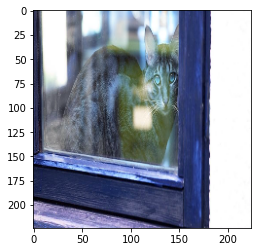

In [13]:
#one more testing set check
print(test_labels[101])
plt.imshow(test_images[101])

In [14]:
#checking split of train/test data to see that they are roughly proportional
df_ytrain = pd.DataFrame(y_train)
print(round(100*(df_ytrain.sum()/df_ytrain.count()),2))

df_yval = pd.DataFrame(y_val)
print(round(100*(df_yval.sum()/df_yval.count()),2))

0    48.2
1    51.8
dtype: float64
0    55.71
1    44.29
dtype: float64


This output compares the percentage makeup of each species of the training and validation datasets. Both species are making up roughly half of both the training and validation sets, which is what we want and expect.

# Modeling

The first model will be a Sequential Neural Network model, compiled using the Adam optimizer and assessed for performance based on accuracy.

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

tf.random.set_seed(42)

model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3,))) 
model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(2,2))
#model1.add(Dropout(0.25))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(2,2))
#model1.add(Dropout(0.25))

model1.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(2,2))
#model1.add(Dropout(0.25))

model1.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(2,2))
#model1.add(Dropout(0.25))

model1.add(Flatten())

model1.add(Dense(256, activation='relu'))
model1.add(BatchNormalization())
#model1.add(Dropout(0.5))

model1.add(Dense(2, activation = 'softmax'))

In [18]:
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [19]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 220, 220, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 108, 108, 64)     2

In [20]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [21]:
history1 = model1.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/50
14/14 [==============================] - 120s 8s/step - loss: 1.7121 - accuracy: 0.5468 - val_loss: 5.2605 - val_accuracy: 0.5357 - lr: 0.0010
Epoch 2/50
14/14 [==============================] - 115s 8s/step - loss: 0.6291 - accuracy: 0.7146 - val_loss: 6.9950 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 3/50
14/14 [==============================] - ETA: 0s - loss: 0.3811 - accuracy: 0.8345
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
14/14 [==============================] - 117s 8s/step - loss: 0.3811 - accuracy: 0.8345 - val_loss: 1.9950 - val_accuracy: 0.5071 - lr: 0.0010
Epoch 4/50
14/14 [==============================] - 115s 8s/step - loss: 0.3425 - accuracy: 0.8729 - val_loss: 3.4726 - val_accuracy: 0.4500 - lr: 5.0000e-04
Epoch 5/50
14/14 [==============================] - ETA: 0s - loss: 0.2211 - accuracy: 0.9257
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
14/14 [==============================] - 117s 8s/st

In [22]:
y_pred1 = model1.predict(X_val)

5/5 [==============================] - 10s 2s/step


In [23]:
y_pred1 = np.array(y_pred1)

In [24]:
cm1 = confusion_matrix(y_val.argmax(axis=1), y_pred1.argmax(axis=1))
print('Confusion Matrix\n')
print(cm1)

Confusion Matrix

[[51 27]
 [20 42]]


In [25]:
#checking proportionality of results for each species
print('Cats: ', cm1[0].sum() - (cm1[0].sum() - cm1[0][0]), ' correct out of ', cm1[0].sum(), ' instances. Accuracy: ', round(1-(cm1[0].sum()-cm1[0][0])/cm1[0].sum(),2))
print('Dogs: ', cm1[1].sum() - (cm1[1].sum() - cm1[1][1]), ' correct out of ', cm1[1].sum(), ' instances. Accuracy: ', round(1-(cm1[1].sum()-cm1[1][1])/cm1[1].sum(),2))

Cats:  51  correct out of  78  instances. Accuracy:  0.65
Dogs:  42  correct out of  62  instances. Accuracy:  0.68


The second model is an application of transfer learning to create a MobileNetV2 model. 

Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

In [26]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from keras.callbacks import ModelCheckpoint, Callback
from keras.layers import Reshape
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon
from tensorflow.keras.layers import GlobalAveragePooling2D

In [27]:
mnet = MobileNetV2(include_top = False, weights = 'imagenet', input_shape=(224,224,3))

9406464/9406464 [==============================] - 0s 0us/step


In [29]:
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model2 = Sequential([mnet,
                    GlobalAveragePooling2D(),
                    Dense(512, activation = "ReLU"),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation = "ReLU"),
                    Dropout(0.1),
                    Dense(32, activation = "ReLU"),
                    Dropout(0.3),
                    Dense(2, activation = "sigmoid")])

model2.layers[0].trainable = False

model2.compile(loss="categorical_crossentropy", optimizer="Adam", metrics="accuracy")

model2.summary()
Model2: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                        

In [30]:
history2 = model2.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/50
14/14 [==============================] - 29s 2s/step - loss: 0.8504 - accuracy: 0.5827 - val_loss: 0.7256 - val_accuracy: 0.5857 - lr: 0.0010
Epoch 2/50
14/14 [==============================] - 20s 1s/step - loss: 0.6112 - accuracy: 0.7122 - val_loss: 0.7082 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 3/50
14/14 [==============================] - 21s 1s/step - loss: 0.4596 - accuracy: 0.7866 - val_loss: 0.6982 - val_accuracy: 0.6286 - lr: 0.0010
Epoch 4/50
14/14 [==============================] - 21s 2s/step - loss: 0.3842 - accuracy: 0.8393 - val_loss: 0.8084 - val_accuracy: 0.6286 - lr: 0.0010
Epoch 5/50
14/14 [==============================] - 20s 1s/step - loss: 0.4366 - accuracy: 0.8106 - val_loss: 0.6938 - val_accuracy: 0.6714 - lr: 0.0010
Epoch 6/50
14/14 [==============================] - 22s 2s/step - loss: 0.3802 - accuracy: 0.8153 - val_loss: 0.6567 - val_accuracy: 0.7071 - lr: 0.0010
Epoch 7/50
14/14 [==============================] - 21s 2s/step - loss: 0.3285 - a

In [32]:
y_pred2 = model2.predict(X_val)

5/5 [==============================] - 6s 938ms/step


In [33]:
y_pred2 = np.array(y_pred2)

In [34]:
cm2 = confusion_matrix(y_val.argmax(axis=1), y_pred2.argmax(axis=1))
print('Confusion Matrix\n')
print(cm2)

Confusion Matrix

[[59 19]
 [18 44]]


In [35]:
#checking proportionality of results for each species
print('Cats: ', cm2[0].sum() - (cm2[0].sum() - cm2[0][0]), ' correct out of ', cm2[0].sum(), ' instances. Accuracy: ', round(1-(cm2[0].sum()-cm2[0][0])/cm2[0].sum(),2))
print('Dogs: ', cm2[1].sum() - (cm2[1].sum() - cm2[1][1]), ' correct out of ', cm2[1].sum(), ' instances. Accuracy: ', round(1-(cm2[1].sum()-cm2[1][1])/cm2[1].sum(),2))


Cats:  59  correct out of  78  instances. Accuracy:  0.76
Dogs:  44  correct out of  62  instances. Accuracy:  0.71


The second model is the better model, based on its accuracy for both cats and dogs. I will do some further analysis and visualization for this more successful model.

In [37]:
import matplotlib.pyplot
train_acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
xc = range(16) #16 epochs

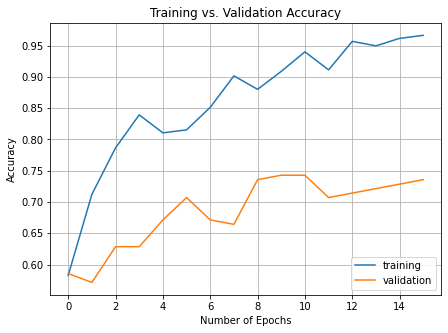

In [38]:
plt.figure(1,figsize=(7,5))
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.grid(True)
plt.legend(['training','validation'],loc=4)

# Testing

In [39]:
pred_labels = model2.predict(test_images)

5/5 [==============================] - 6s 1s/step


In [43]:
#one-hot encoding of test image labels
test_labels = pd.get_dummies(test_labels).values

In [63]:
#pred_labels needs each of its arguments to be rounded to either 0 or 1, making it comparable to the original test image labels
#code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
def rounded(i):
  i[np.argwhere(i != i.max())] = 0
  i[np.argwhere(i == i.max())] = 1
  return i

for labels in pred_labels:
  labels = rounded(labels)


#print(pred_labels)

In [58]:
print(classification_report(test_labels, pred_labels, target_names=['cats','dogs']))

              precision    recall  f1-score   support

        cats       0.61      0.69      0.64        70
        dogs       0.64      0.56      0.60        70

   micro avg       0.62      0.62      0.62       140
   macro avg       0.62      0.62      0.62       140
weighted avg       0.62      0.62      0.62       140
 samples avg       0.62      0.62      0.62       140



The model did pretty well, but does have room for improvement. 

Ultimately, it was able to perform at an average around 75% accuracy for images of cats and dogs in the validation dataset. The classification report above shows precision, recall, and F1-score metrics of between approximately 0.6-0.7 for both cats and dogs with the testing dataset.

This performance could potentially be improved by data augmentation, further training and/or model parameter tweaking, transfer learning from more complex image classification models, or some combination of these techniques.